## Data Loading from Source: In this section we will be loading UCI heart disease data. 

In [317]:
import xgboost as xgb
import sklearn as SK
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.ticker as ticker

In [318]:
df_heart_disease = pd.read_csv('heart_disease_dataset_UCI.csv')

## Data Pre-Processing:
- Data cleaning 
- Remove NANs
- Look for missing and unimportant data

## Description of feature vectors:
 - description

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,
- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol**: The person's cholesterol measurement in mg/dl
- **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**: The person's maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca**: The number of major vessels (0-3)
- **thal**: A blood disorder called thalassemia 
    - 0: NULL (dropped from the dataset previously)
    - 1: fixed defect (no blood flow in some part of the heart)
    - 2: normal blood flow
    - 3: reversible defect (a blood flow is observed but it is not normal)
- **target**: Heart disease (0 = no, 1 = yes)



In [319]:
df_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [320]:
df_heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Check for Null and NANs

In [321]:
df_heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [322]:
df_heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [323]:
df_heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [324]:
input_features = df_heart_disease.iloc[:,1:]
output_features = df_heart_disease.iloc[:,-1]

# **_Exploratory Data Analysis_**:
## Check outliers using Inter Quantile Range (IQR):

We are not going to remove outliers since they carry valuable info about certain types of patients. However, it can give us an idea on the necessecity of the exploratory data analysis.

In [325]:
Q1 = df_heart_disease.quantile(0.75)
Q3 = df_heart_disease.quantile(0.25)
IQR = Q3 - Q1

In [326]:
IQR

age        -13.5
sex         -1.0
cp          -2.0
trestbps   -20.0
chol       -63.5
fbs          0.0
restecg     -1.0
thalach    -32.5
exang       -1.0
oldpeak     -1.6
slope       -1.0
ca          -1.0
thal        -1.0
target      -1.0
dtype: float64

In [327]:
df_heart_disease_IQR = (df_heart_disease < (Q1 - 1.5 * IQR)) |(df_heart_disease > (Q3 + 1.5 * IQR))

In [328]:
df_heart_disease_IQR

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,False,True,True,True,True,True,True,True,True
2,True,True,True,True,True,False,True,True,True,True,True,True,True,True
3,True,True,True,True,True,False,True,True,True,True,True,True,True,True
4,True,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,True,True,True,True,True,False,True,True,True,True,True,True,True,True
299,True,True,True,True,True,False,True,True,True,True,True,True,True,True
300,True,True,True,True,True,True,True,True,True,True,True,True,True,True
301,True,True,True,True,True,False,True,True,True,True,True,True,True,True


In [329]:
df_heart_disease_IQR.all(axis=0)

age          True
sex          True
cp           True
trestbps     True
chol         True
fbs         False
restecg      True
thalach      True
exang        True
oldpeak      True
slope        True
ca           True
thal         True
target       True
dtype: bool

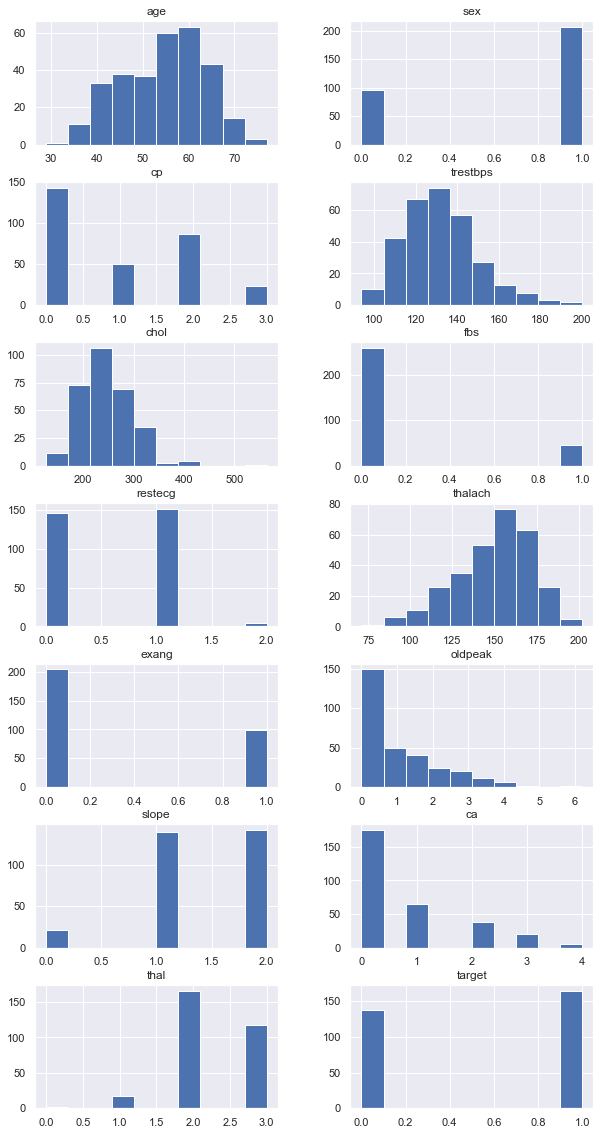

In [330]:
%matplotlib inline
fig, axis = plt.subplots(7,2,figsize=(10, 20));
df_heart_disease.hist(ax=axis);

In [331]:
def data_Sex(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'

def data_target(target):
    if target == 0:
        return 'No Heart Disease'
    else:
        return 'With Heart Disease'
    
def data_thal(thal):
    if thal == 0:
        return 'Non conclusive'
    elif thal == 1:
        return 'Defective heart'
    elif thal == 2:
        return 'Normal Heart'
    else:
        return 'Reversible defect'

def data_cp(cp):
    if cp == 0:
        return 'Typical angina'
    elif cp == 1:
        return 'Atypical angina'
    elif cp== 2:
        return 'Non-anginal pain'
    else:
        return 'Asymptomatic'
    
def data_restecg(restecg):
    if restecg == 0:
        return 'left ventricular hypertrophy'
    elif restecg == 1:
        return 'normal'
    else:
        return 'abnormality in ST-T wave'

def data_st_slope(slope):
    if slope == 0:
        return 'downsloping'
    elif slope == 1:
        return 'flat'
    else:
        return 'upsloping'
    
    
df_heart_disease_with_catagoricalData = df_heart_disease.copy()
df_heart_disease_with_catagoricalData['sex'] = df_heart_disease['sex'].apply(data_Sex)
df_heart_disease_with_catagoricalData['target'] = df_heart_disease['target'].apply(data_target)
df_heart_disease_with_catagoricalData['thal'] = df_heart_disease['thal'].apply(data_thal)
df_heart_disease_with_catagoricalData['cp'] = df_heart_disease['cp'].apply(data_cp)
df_heart_disease_with_catagoricalData['restecg'] = df_heart_disease['restecg'].apply(data_restecg)
df_heart_disease_with_catagoricalData['slope'] = df_heart_disease['slope'].apply(data_st_slope)



In [332]:
df_heart_disease_with_catagoricalData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,Asymptomatic,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0,Defective heart,With Heart Disease
1,37,male,Non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0,Normal Heart,With Heart Disease
2,41,female,Atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0,Normal Heart,With Heart Disease
3,56,male,Atypical angina,120,236,0,normal,178,0,0.8,upsloping,0,Normal Heart,With Heart Disease
4,57,female,Typical angina,120,354,0,normal,163,1,0.6,upsloping,0,Normal Heart,With Heart Disease


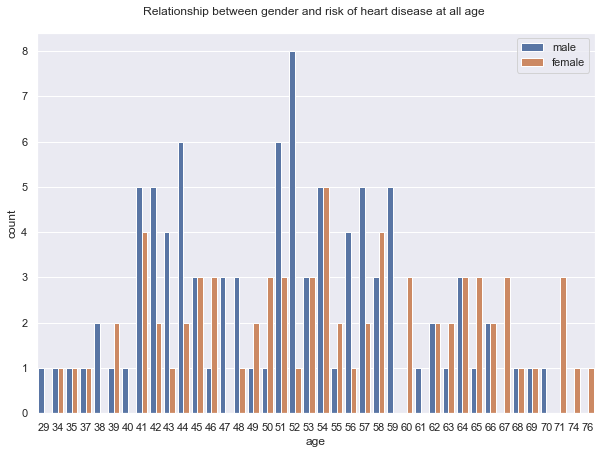

In [333]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data= df_heart_disease_with_catagoricalData[df_heart_disease_with_catagoricalData['target']=='With Heart Disease'], x='age',hue='sex')
plt.title('Relationship between gender and risk of heart disease at all age \n');
plt.legend(loc='upper right');

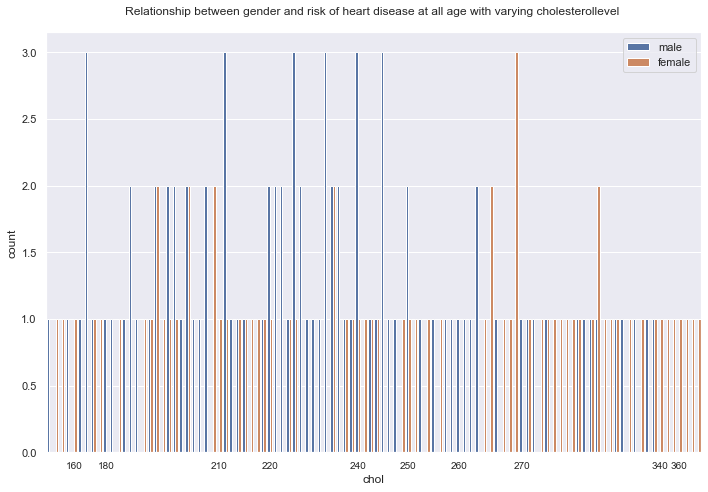

In [334]:
sns.set(rc={'figure.figsize':(10,7), 'xtick.labelsize':10})
plot_ = sns.countplot(data= df_heart_disease_with_catagoricalData[df_heart_disease_with_catagoricalData['target']=='With Heart Disease'], x='chol', hue='sex')
for label in plot_.get_xticklabels():
    if int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title('Relationship between gender and risk of heart disease at all age with varying cholesterollevel \n');
plt.tight_layout();
plt.legend(loc='upper right');

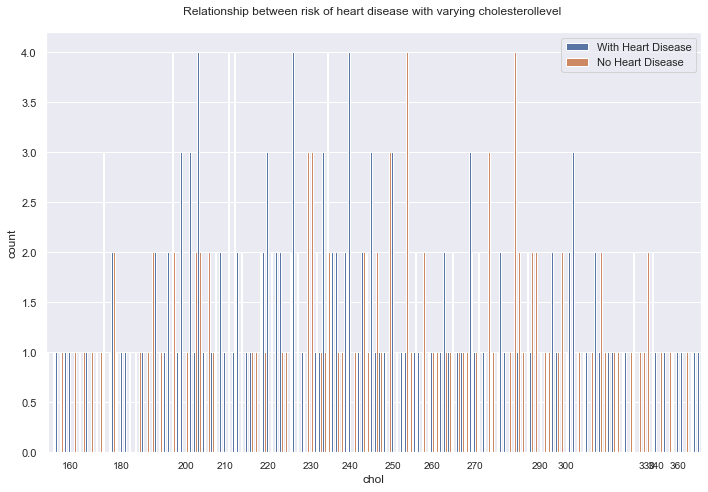

In [335]:
sns.set(rc={'figure.figsize':(10,7), 'xtick.labelsize':10})
plot_ = sns.countplot(data= df_heart_disease_with_catagoricalData, x='chol', hue='target')
for label in plot_.get_xticklabels():
    if int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title('Relationship between risk of heart disease with varying cholesterollevel \n');
plt.tight_layout();
plt.legend(loc='upper right');

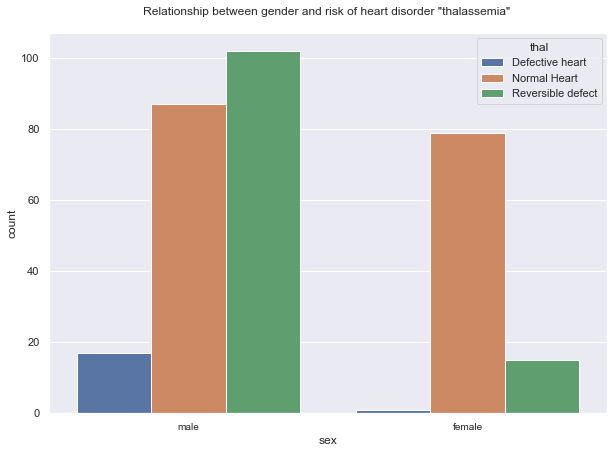

In [336]:
sns.countplot(data= df_heart_disease_with_catagoricalData[df_heart_disease_with_catagoricalData['thal'] != 'Non conclusive'], x='sex',hue='thal')
plt.title('Relationship between gender and risk of heart disorder "thalassemia" \n');

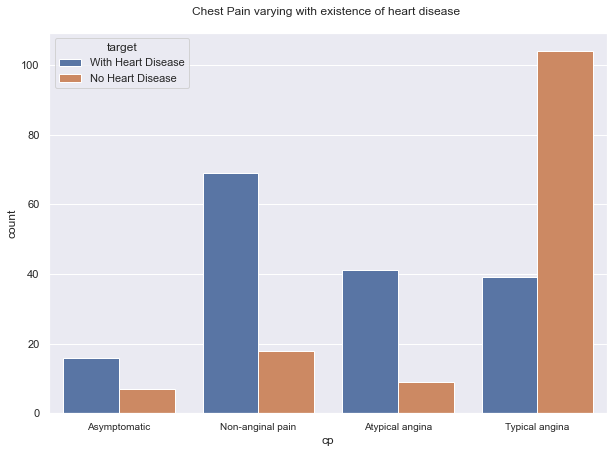

In [337]:
sns.countplot(data= df_heart_disease_with_catagoricalData, x='cp',hue='target')
plt.title('Chest Pain varying with existence of heart disease \n');

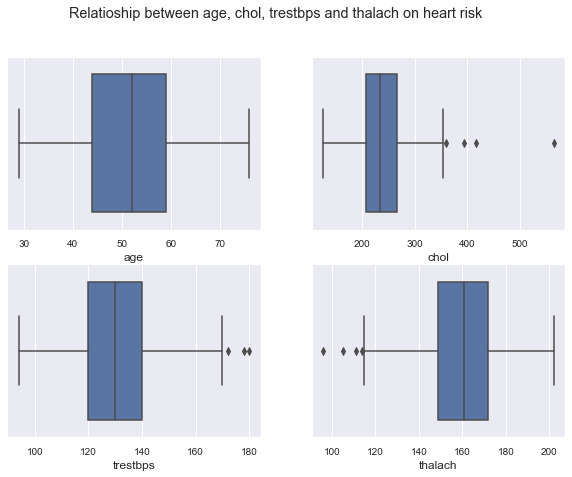

In [338]:
fig, axes = plt.subplots(2, 2)
fig.suptitle('Relatioship between age, chol, trestbps and thalach on heart risk \n')
sns.boxplot(data=df_heart_disease_with_catagoricalData[df_heart_disease_with_catagoricalData['target']=='With Heart Disease'], x='age', hue='target', ax=axes[0,0]);
sns.boxplot(data=df_heart_disease_with_catagoricalData[df_heart_disease_with_catagoricalData['target']=='With Heart Disease'], x='chol', hue='target', ax=axes[0,1]);
sns.boxplot(data=df_heart_disease_with_catagoricalData[df_heart_disease_with_catagoricalData['target']=='With Heart Disease'], x='trestbps', hue='target', ax=axes[1,0]);
sns.boxplot(data=df_heart_disease_with_catagoricalData[df_heart_disease_with_catagoricalData['target']=='With Heart Disease'], x='thalach', hue='target', ax=axes[1,1]);

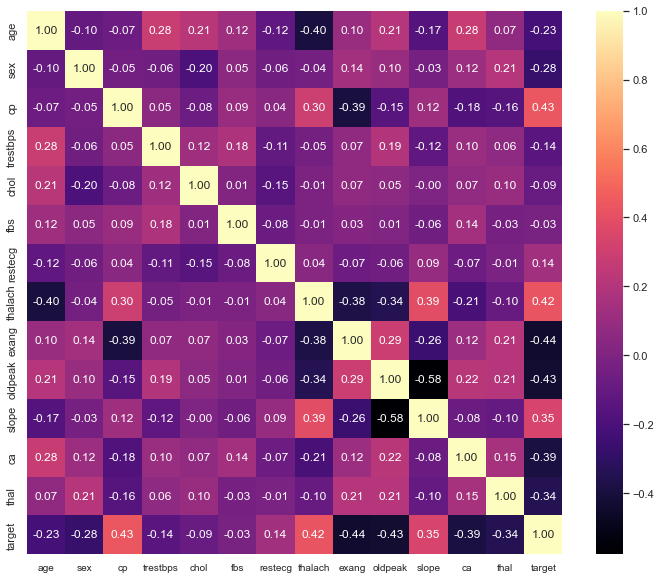

In [339]:
plt.figure(figsize=(12,10))
sns.heatmap(df_heart_disease.corr(),annot=True,cmap="magma",fmt='.2f');

# Important Feature Selection:
## 1. Univariate Feature Selection

In [357]:
L_feature = len(df_heart_disease.columns)

In [363]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_heart_disease.iloc[:,:L_feature-1], df_heart_disease.iloc[:,-1], test_size=0.3, random_state=42)

In [370]:
from sklearn.feature_selection import SelectKBest, chi2


X_5_best= SelectKBest(chi2, k=5).fit(x_train, y_train)
mask = X_5_best.get_support() #list of booleans for selected features
new_feat = [] 


for bool, feature in zip(mask, x_train.columns):
    if bool:
        new_feat.append(feature)
        
        
print(new_feat)

['cp', 'thalach', 'exang', 'oldpeak', 'ca']
